<a href="https://colab.research.google.com/github/roop01/python-visualization/blob/main/01_plotly_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plotly**

Plotly is a data visualization library for creating interactive charts and graphs. Some of its special features include:

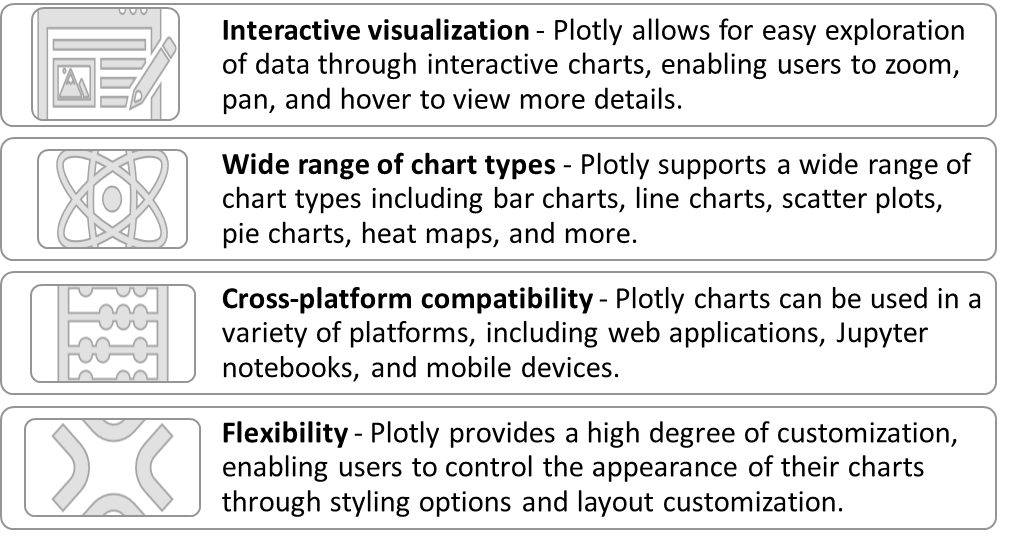

**Objects in Plotly**

In Plotly, an object refers to a graphical element in a Plotly chart. There are different types of objects in Plotly, including:

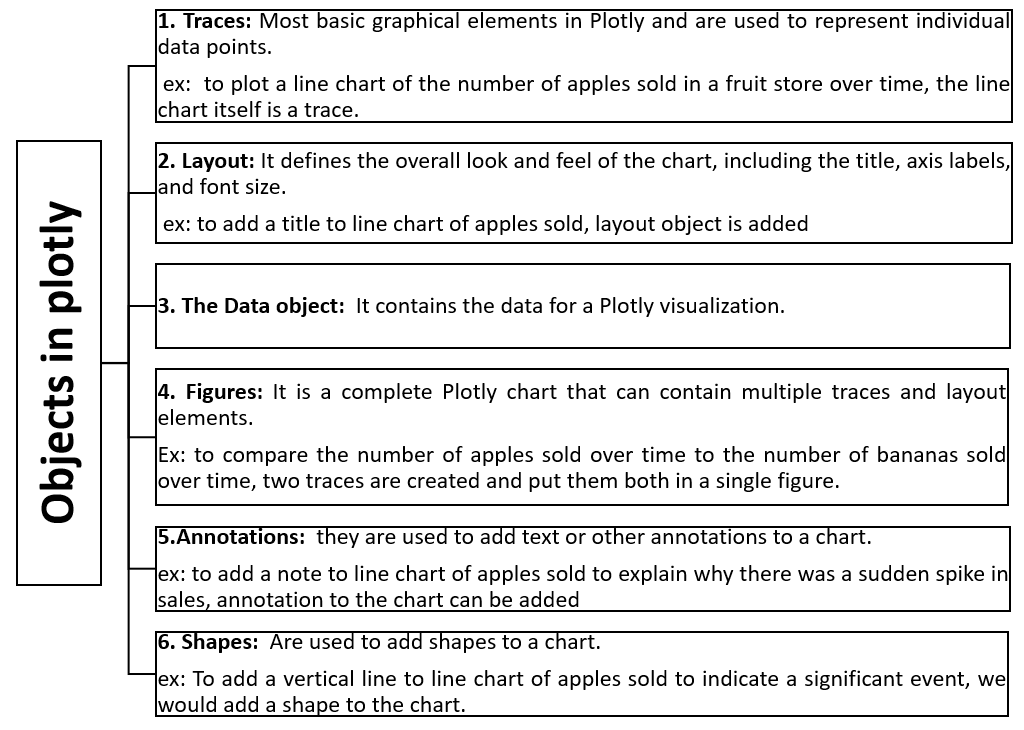

In [ ]:
import plotly.graph_objs as go
# Creating traces
trace1 = go.Scatter(x=[1, 2, 3, 4, 5], y=[10, 11, 12, 13, 14], name="trace1")
trace2 = go.Scatter(x=[1, 2, 3, 4, 5], y=[14, 13, 12, 11, 10], name="trace2")
# Creating layout
layout = go.Layout(title="Two Traces Plot", xaxis_title="X-axis Title",
    yaxis_title="Y-axis Title")
# Creating the data object
data = [trace1, trace2]
# Creating the figure object
fig = go.Figure(data=data, layout=layout)
# Creating annotations
annotation1 = dict(x=3, y=12, xref="x", yref="y", text="Annotation 1", showarrow=True, arrowhead=2, ax=50, ay=-30)
annotation2 = dict(x=2, y=11, xref="x", yref="y", text="Annotation 2", showarrow=True, arrowhead=3, ax=-50, ay=-30)
annotations = [annotation1, annotation2]
fig.update_layout(annotations=annotations)
# Creating shapes
shape1 = dict(type="rect", xref="x", yref="paper", x0=2.5, x1=4, y0=0, y1=1, fillcolor="green", opacity=0.2, layer="below")
shape2 = dict(type="rect", xref="x", yref="y", x0=3, y0=11, x1=4, y1=13, line=dict(color="blue", width=2, dash="dot"))
shapes = [shape1, shape2]
fig.update_layout(shapes=shapes)
# Show the figure
fig.show()


Basic graphs using plotly on **Gapminder’s_Socio_Economic** Dataset

This dataset contains information from several entities, such as the International Database of the US Census Bureau, the Institute for Health Metrics and Evaluation, the United Nations Statistics Division, and the World Bank.

Following are the details of the dataset.

* country: a unique identifier for a particular country

* incomeperperson: the gross domestic product (GDP) per capita in 2010, adjusted for inflation using 2000 US dollars. It does not consider differences in the cost of living between countries.

* alcconsumption: the average recorded and estimated alcohol consumption per adult (age 15+) in litres of pure alcohol for the year 2008

* armedforcesrate: the percentage of the total labor force composed of armed forces personnel

* breastcancerper100TH: the number of new cases of breast cancer per 100,000 female residents during the year 2002

* co2emissions: the total amount of carbon dioxide emissions in metric tons since 1751, as of the year 2006

* femaleemployrate: the percentage of female population above the age of 15 who have been employed during the year 2007

* HIVrate: the estimated number of people living with HIV per 100 population of age group 15-49, as of the year 2009

* Internetuserate: the number of internet users per 100 people, as of the year 2010

* lifeexpectancy: the average number of years a newborn child would live if current mortality patterns remained the same, as of the year 2011

* oilperperson: the amount of oil consumption per capita in tonnes per year and person, as of the year 2010

* polityscore: a democracy score ranging from -10 (lowest) to 10 (highest) calculated using the Polity IV dataset for the year 2009, which measures a country's level of democracy and freedom

* relectricperperson: the amount of residential electricity consumption per person in kilowatt-hours (kWh) for the year 2008

* suicideper100TH: the mortality rate due to self-inflicted injury per 100,000 standard population, age-adjusted

* employrate: the percentage of the total population above the age of 15 who have been employed during the year 2007

* urbanrate: the percentage of the total population living in urban areas, as defined by national statistical offices, as of the latest available estimate.

**Problem 1:**
Are there significant differences in alcohol consumption rates between high-income and low-income countries?

Let us plot a box plot to visualize the distribution of alcohol consumption rates for high-income and low-income countries.

In [ ]:
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('/content/sample_data/gapminder_socio_economic_data.csv')
data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
3,Andorra,21943.339900,10.17,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,5.362179,NaN,88.92
4,Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.999954,51.093,NaN,-2.0,172.999227,14.554677,75.699997,56.70


In [ ]:
# Create a new column indicating whether a country is high or low income
income_cutoff = data["incomeperperson"].quantile(0.75)
data["income_group"] = ["High Income" if x >= income_cutoff else "Low Income" for x in data["incomeperperson"]]

# Create a box plot
fig = px.box(data_frame=data, x="income_group", y="alcconsumption",
            title="Alcohol Consumption by Income Group",
            labels={"income_group": "Income Group", "alcconsumption": "Alcohol Consumption (liters per capita)"})
fig.show()


It can be observed that the alcohol consumption rate median value is equal to 5.07(ltrs/capita) for countries in low income group where as the median = 9.73 (ltrs/capita) for high income groups. Which indicates that alcohol consumption rate is considerably higher in high income countries.

**Problem 2:**
What is the distribution of life expectancy across all countries in the dataset ?

Histogram can be used to display the distribution of life expectancy across all the countries in the dataset.

In [ ]:
### Histogram
fig = px.histogram(data, x="lifeexpectancy", nbins=30, title="Distribution of Life Expectancy")
fig.show()


**Analysis:**

* The histogram shows that about 50% of the countries have life expectancy >= 70 years where as remaining 50% of the countries have life expectancy < 70 years.
* It is interesting to note that, there are 10% of the countries have life expectancy < 55 years and 15% of the countries have the life expectancy > 80 years.

**Problem 3:**  Explore the distribution of the employment rate across different regions of the world and to identify any potential patterns or differences in the distribution.

We can use the violin plot to explore the distribution of the employment rate across different regions of the world and to identify any potential patterns or differences in the distribution.

In [ ]:
fig = px.violin(data, y="employrate", points="all",
               title="Distribution of Employment Rate",
               labels={"employrate": "Employment Rate"})
fig.show()


**Analysis:**

* The violin plot indicates that the employment rate across different regions of the world is normally distributed.
* The range of employement rate lies from 32-83.2 and median is about 58.7.

**Problem 4:**  Is there a correlation between a country's GDP per capita and its CO2 emissions?

We can use the scatter plot to examine the correlation between variables. Let's understand how to use scatter plot with plotly.graph_objs.

Scatter plot with plotly.graph_objs:If you want to create a scatter plot with custom colors and markers, you would use plotly.graph_objs to define the scatter trace and customize its properties, such as mode, marker, and colorscale.

In [ ]:
import plotly.graph_objs as go
# create the scatter plot
fig = go.Figure(data=go.Scatter(x=data["incomeperperson"], y=data["co2emissions"],
                                text=data["country"],mode='markers',
    marker=dict(
        size=10,
       color=data["incomeperperson"],
        colorscale='rainbow',
        opacity=0.6,
        showscale=True
    )
)
)
# add axis titles and a title to the plot
fig.update_layout(title="Relationship between GDP per capita and CO2 Emissions",
                   xaxis_title="GDP per capita (USD)", yaxis_title="CO2 Emissions (metric tons per capita)")
# show the plot
fig.show()


**Analysis:**

* Though there is no particular correlation exists for all the countries, there exists a positive linear correlation between CO2 emissions and GDP (per capita USD ) for the leading economies like India, China, Russia, Japan, Germany, France and USA.

* USA acoounts for highest CO2 emissions with 334B metric tons/per capita with 37.49k GDP per capita (USD) .

**Problem 5:**  What is the proportion of countries  with high, and low GDP per capita?

We can use a pie chart / donut chart to understand what is the proportion of countries with high,and low GDP per capita.

In [ ]:
import plotly.graph_objs as go
# count the number of occurrences of each income group
income_counts = data['income_group'].value_counts()
# create a pie chart
fig = go.Figure(
    data=go.Pie(
        labels=income_counts.index,
        values=income_counts.values,
        hole=0.5,
        marker_colors=['#9ACD32', '#FFD700', '#CD5C5C'],
    )
)
# update the layout
fig.update_layout(
    title='Proportion of Countries by GDP Per Capita',
    annotations=[
        dict(text='GDP per Capita', x=0.5, y=0.5, font_size=20, showarrow=False)
    ]
)
# show the plot
fig.show()


**Analysis:**

* There are about 22.5% of the countries there in high income category with respect to their GDP / capita.
Where as 77.5% of the countries belong to low income category.

**Problem 6:** How does the relationship between internet usage and GDP per capita differ between high-income and low-income countries?

Let's use joint plot to visualize the above stated relation.

In [ ]:
import plotly.express as px
fig = px.scatter(data, x="incomeperperson", y="internetuserate", color="income_group", marginal_y="violin",
                 marginal_x="violin")
fig.show()


**Analysis:**

* From the bivariate analysis of joint plot, it is evident that the incomeperperson is closely related to internetuserate. Incomeperperson increases the internetuserate has also increased considerably.
* Incomeperperson distribution on the top shows that it has the data spread-out over a wide range in higher income group as compared to lower income group.
* Internet use rate distribution plot on the right side indicates that the high-income countries have the privilege of using high internet use rate compared to low-income countries.

**Problem 7:** Explore the correlations between different variables for all countries.

Using a heatmap we can understand how different variables are related to each other.

In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd
#select 8 variables for heatmap
selected_vars= ['incomeperperson', 'alcconsumption', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate']
#slice the data to only include selected variables
data_slice = data[selected_vars]
#calculate the correlation matrix
corr = data_slice.corr().round(2)
#Create the heatmap
fig = ff.create_annotated_heatmap(
z=corr.values.tolist(),
x=list(corr.columns),
y=list(corr.index),
colorscale="Viridis",
showscale=True
)
#update layout
fig.update_layout(
height=900,
width=900,
margin=dict(t=200),
autosize=True,
title="Correlation Heatmap",
xaxis_title="Variables",
yaxis_title="Variables"
)
#Show the plot
fig.show()


**Analysis:** Heatmap shows the correlation between the different variables of the dataset. following are some of the observations:


* Internetuserate and incomeperperson have a highly positive correlation with a value 0.75.
* Internetuserate and breastcancerper100th also have a highly positive correlation with a value 0.79.
* breastcancerper100th and alcohol consumption variables have a high correlation of 0.49.
* Femaleemplyeerate is mostly uncorrelated with all variables except alcohol consumption.

**Problem 8:** How do different variables correlate with each other for countries belonging to different income groups?

To understand the the correlation between variables for all countries belonging to different income groups we can use pair plot.

In [ ]:
import plotly.express as px
import pandas as pd
# Subset the data to only include the selected variables and income group
subset = data[['oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'income_group']]
# Create the pair plot
fig = px.scatter_matrix(subset, dimensions=subset.columns[:-1], color='income_group')
# Update layout
fig.update_layout(
    title="Pair Plot of Selected Variables by Income Group",
    height=1000,
    width=1000
)
# Show the plot
fig.show()


**Analysis:**

* It can be observed that, oilperperson is having slight positive correlation with urbanrate for high income countries.
* It is interesting to note that, high income countries with high relectricperperson have high suicide rate as compared to low-income countries with less relectricperperson.

# **Excercise:**

The **mpg (miles per gallon)** dataset contains information on various car models, including the manufacturer, model name, engine displacement, number of cylinders, and miles per gallon (mpg) for both city and highway driving.

1. Illustrate the relationship between engine displacement (displ) and miles per gallon (mpg) of cars based on number of cylinders they have.
2. Visualize how mean miles per gallon (mpg) varies with each model year (yr) and provide the inference form the chart.
3. What is the relationship between mean miles per gallon (mpg) for cars with the same number of cylinders?
4. Compare the distribution of miles per gallon (mpg) for different car origins.
5. Explore the distribution of miles per gallon (mpg) for all the cars in the mpg data set
6. Perform a bivariate analysis between miles per gallon and horsepower of cars. Also, visualize the respective distributions on the same plot.
7. Find the correlations between the following variables- mpg,cylinders,displacement,horsepower,weight,acceleration,model year,and origin.